### Import packages and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

from openpyxl import load_workbook

sheet_names = load_workbook(filename="./data/Expenses.xlsx").sheetnames

read_excel_file = pd.read_excel("./data/Expenses.xlsx", 
                                sheet_name=sheet_names[2:], 
                                usecols=[0,1], 
                                header=4)

df = pd.concat(read_excel_file, ignore_index=True)
df

,Item,Cost (BDT)
0,Gadgets,30.0
1,Snacks,20.0
2,Breakfast,30.0
3,Snacks,40.0
4,Snacks,35.0
...,...,...
695,Snacks,30.0
696,Breakfast,45.0
697,Internet Bill,125.0
698,Snacks,10.0


### Handling Missing Data & Data cleaning

In [2]:
df["Cost (BDT)"].fillna(0, inplace=True)
df["Item"] = df["Item"].str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Item        700 non-null    object 
 1   Cost (BDT)  700 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


/tmp/ipykernel_10747/344204833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cost (BDT)"].fillna(0, inplace=True)


In [3]:
grouped_cost = df.groupby(by=["Item"]).sum()
grouped_cost

,Cost (BDT)
Item,
Balance,500.00
Books,1085.00
Breakfast,2942.00
Clothing,2430.00
Donation,1572.21
Due,0.00
Fare,5090.00
Fee,11018.16
Fitra,350.00


<Axes: xlabel='Item'>

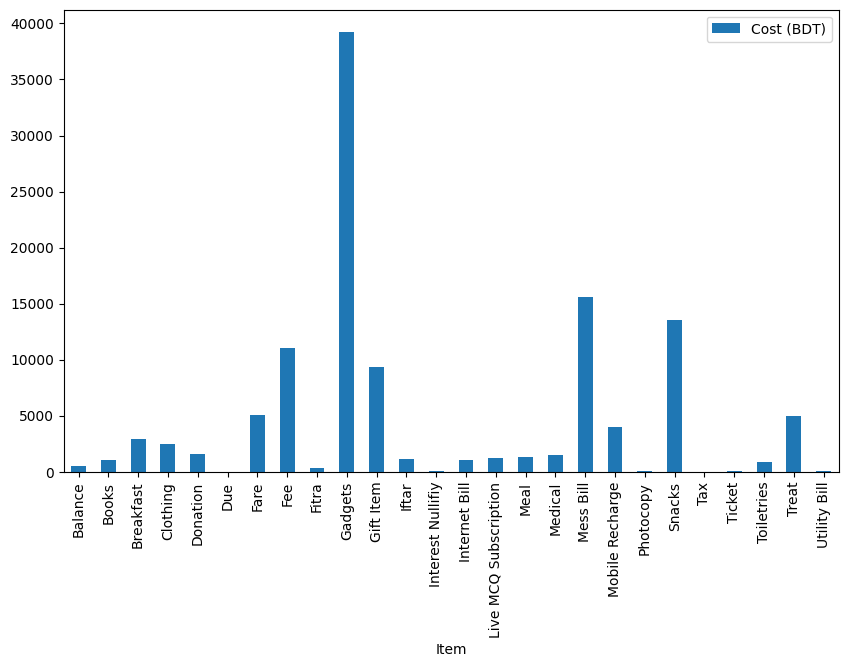

In [21]:
grouped_cost.plot(kind="bar",figsize=(10, 6))